<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/LMICs_correlations%2C_scatter_plots%2C_and_linear_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pylab
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [52]:
data_path = '/content/df_final_use.csv'
general_df = pd.read_csv(data_path, encoding ='latin-1', sep=';')
general_df.head()

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Total Food Aid,Total Food Aid per capita (kg/cap/year),Region
0,Afghanistan,1980.0,NaN,3933.805,17.10,0.0,0.0,0.0,14186.000,NaN,NaN,17.10,0.0,277.301917,1.205414,0.0,278.507331,NaN,NaN,Central and East Asia
1,Afghanistan,1981.0,NaN,3763.130,96.50,0.0,0.0,0.0,13.984,NaN,NaN,96.50,0.0,269.102546,6.900744,0.0,276.003289,NaN,NaN,Central and East Asia
2,Afghanistan,1982.0,NaN,3602.788,74.90,0.0,0.0,0.0,13673.000,NaN,NaN,74.90,0.0,263.496526,5.477949,0.0,268.974475,NaN,NaN,Central and East Asia
3,Afghanistan,1983.0,NaN,3474.450,79503.00,0.0,0.0,0.0,13.300,NaN,NaN,79503.00,0.0,261.236842,5.977669,0.0,267.214511,NaN,NaN,Central and East Asia
4,Afghanistan,1984.0,NaN,3306.778,21.15,0.0,0.0,0.0,12932.000,NaN,NaN,21.15,0.0,255.705073,1.635478,0.0,257.340551,NaN,NaN,Central and East Asia


In [9]:
#creating a sperate data frames for each mean LMICs values 
AllLDC_food_availablity = general_df.groupby('Year')['Food Availibility per capita (kg/cap/year)'].mean()
foodavailability_df=pd.DataFrame(AllLDC_food_availablity)

AllLDC_production = general_df.groupby('Year')['Production Quantity per capita (kg/cap/year)'].mean()
production_df=pd.DataFrame(AllLDC_production)

AllLDC_food_aid = general_df.groupby('Year')['Total Food Aid per capita (kg/cap/year)'].mean()
food_aid_df= pd.DataFrame(AllLDC_food_aid)

AllLDC_production = general_df.groupby('Year')['Imports (all) per capita (kg/cap/year)'].mean()
import_df=pd.DataFrame(AllLDC_production)

In [51]:
#creating a new data frames with all the mean LMICs values 
fa_prod_df = foodavailability_df.merge(production_df, left_index=True, right_index=True)
fa_prod_imports_df = fa_prod_df.merge(import_df, left_index=True, right_index=True)
mean_df = fa_prod_imports_df.merge(food_aid_df, left_index=True, right_index=True)
mean_df.head()

,Food Availibility per capita (kg/cap/year),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Total Food Aid per capita (kg/cap/year)
Year,,,,
1980.0,164.141936,167.963148,41.088459,NaN
1981.0,163.884964,171.332945,40.959084,NaN
1982.0,162.192904,163.644709,41.366786,NaN
1983.0,162.371607,154.680343,42.776068,NaN
1984.0,162.031741,155.348799,45.194706,NaN


In [11]:
mean_df.corr(method='pearson')
#Evaluating the linear relationship between our variables
#higher linear relationship between imports per capita and food availability per capita (higher corelation coeficient)
#lower linear relationship between production quantity per capita and food availability per capita

,Food Availibility per capita (kg/cap/year),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Total Food Aid per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year),1.000000,0.467165,0.871008,-0.866042
Production Quantity per capita (kg/cap/year),0.467165,1.000000,0.387210,-0.692703
Imports (all) per capita (kg/cap/year),0.871008,0.387210,1.000000,-0.717076
Total Food Aid per capita (kg/cap/year),-0.866042,-0.692703,-0.717076,1.000000


In [12]:
mean_df.corr(method='spearman')
#Evaluates the monotonic relationship between our variables
#higher monotonic relationship between imports per capita and food availability per capita 
#lower monotonic relationship between production quantity per capita and food availability per capita 

,Food Availibility per capita (kg/cap/year),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Total Food Aid per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year),1.000000,0.433766,0.888035,-0.866154
Production Quantity per capita (kg/cap/year),0.433766,1.000000,0.303476,-0.658462
Imports (all) per capita (kg/cap/year),0.888035,0.303476,1.000000,-0.739231
Total Food Aid per capita (kg/cap/year),-0.866154,-0.658462,-0.739231,1.000000


0.9758715644775267
123.65241084966269
0.7586555110226073


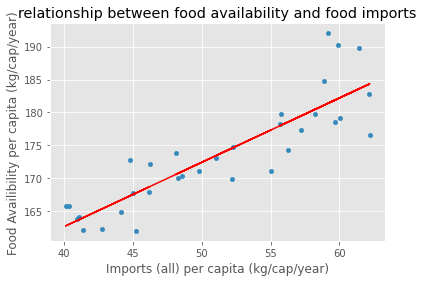

In [53]:
#relationship between Food Imports per capita and Food Availability per capita 
#positive association
mean_df.plot(x='Imports (all) per capita (kg/cap/year)', y='Food Availibility per capita (kg/cap/year)', kind='scatter')
plt.xlabel('Imports (all) per capita (kg/cap/year)')
plt.ylabel('Food Availibility per capita (kg/cap/year)')
plt.title('relationship between food availability and food imports')

#fitting a linear regression line over the scatter plot
#m=0.976, b=123.65
mean_df2 = mean_df.drop([2013.0], axis=0)
x=mean_df2['Imports (all) per capita (kg/cap/year)']
y=mean_df2['Food Availibility per capita (kg/cap/year)']
x= x.to_numpy()
y= y.to_numpy()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, c='red')
print(m)
print(b)

#calculating the R square value
#rS2=0.76 
temp= np.corrcoef(x,y)
temp[0,1]**2
rS2=temp[0,1]**2
print(rS2)

0.2879967280258504
125.42363409399438
0.2182429560348628


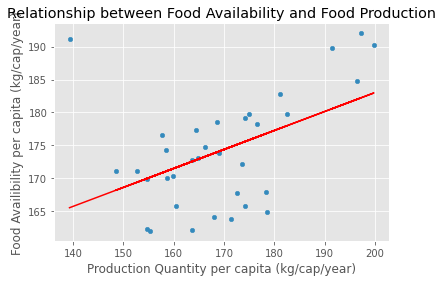

In [54]:
#relationship between Food production per capita and Food Availability per capita 
#positive association
mean_df.plot(x='Production Quantity per capita (kg/cap/year)', y='Food Availibility per capita (kg/cap/year)', kind='scatter')
plt.xlabel('Production Quantity per capita (kg/cap/year)') 
plt.ylabel('Food Availibility per capita (kg/cap/year)')
plt.title('Relationship between Food Availability and Food Production')

#fitting a linear regression line over the scatter plot
#m=0.288, b=125.424
x=mean_df['Production Quantity per capita (kg/cap/year)']
y=mean_df['Food Availibility per capita (kg/cap/year)']
x= x.to_numpy()
y= y.to_numpy()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, c='red')
print(m)
print(b)

#calculating the R square value
#rS2=0.22 
temp= np.corrcoef(x,y)
temp[0,1]**2
rS2=temp[0,1]**2
print(rS2)

-1.5985246993998448
193.12345473573055
0.7500286120495896


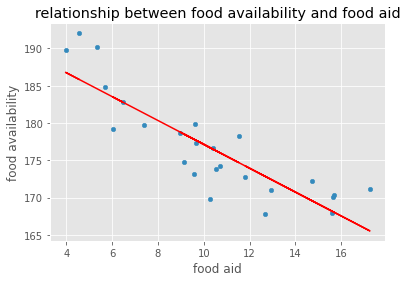

In [55]:
#relationship between Food aid per capita and Food Availability per capita 
#negative association
mean_df.plot(x='Total Food Aid per capita (kg/cap/year)', y='Food Availibility per capita (kg/cap/year)', kind='scatter')
plt.xlabel('food aid')
plt.ylabel('food availability')
plt.title('relationship between food availability and food aid')

#fitting a linear regression line over the scatter plot
#m=-1.6, b=193.123
mean_df3 = mean_df.drop([2013.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0], axis=0)
x=mean_df3['Total Food Aid per capita (kg/cap/year)']
y=mean_df3['Food Availibility per capita (kg/cap/year)']
x= x.to_numpy()
y= y.to_numpy()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, c='red')
print(m)
print(b)

#calculating the R square value
#rS2=0.75 
temp= np.corrcoef(x,y)
temp[0,1]**2
rS2=temp[0,1]**2
print(rS2)